<IPython.core.display.Javascript object>


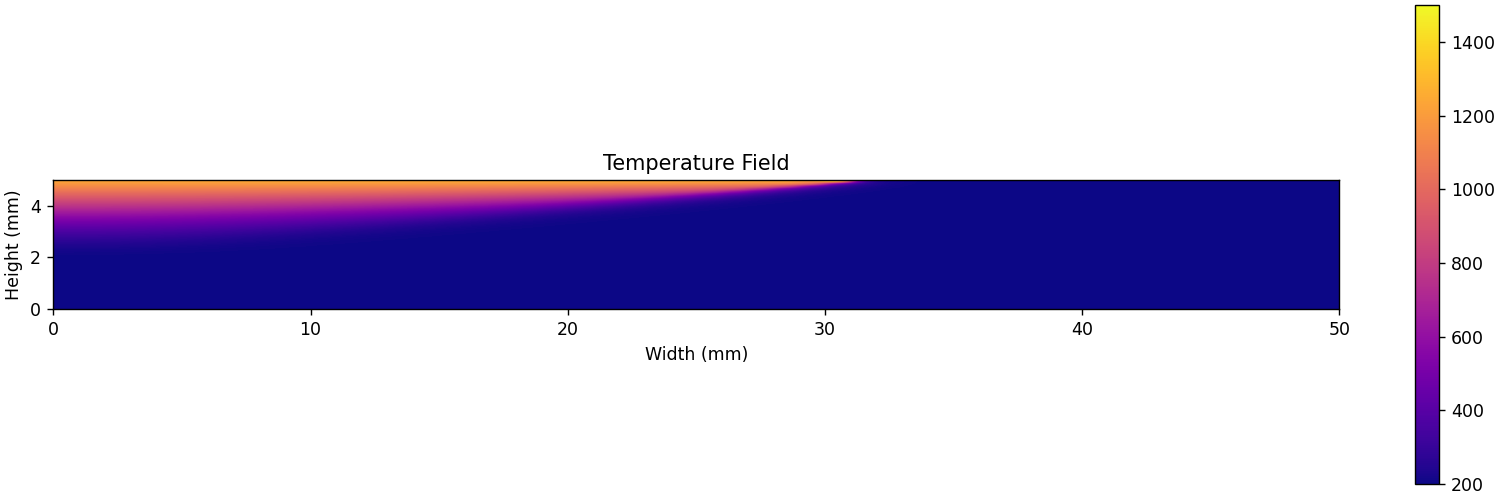

KeyboardInterrupt: 

In [1]:

import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
%matplotlib notebook



#entering constants

Nx = 50
Ny = 50

t_end = 5
Ly = 0.05
Lx = 0.005
l = 18
po = 4500
c = 530
T0 = 200
Th = 1500
Tc = 200

# summation steps

a = l/(po*c)
hx = Lx/(Nx-1)
hy = Ly/(Ny-1)
tau = t_end/100

#Temp arrays
T = np.zeros((Nx, Ny))
alfa = np.zeros(Nx)
beta = np.zeros(Ny)

for i in range ( 0, Nx):
    for j in range (0, Ny):

        T[i,j]=T0

time = 0
t = -1

fig, ax = plt.subplots(1, 1, figsize=(12, 4), constrained_layout=True)

while time <= t_end:
    
    t = t+1
    time = time + tau

    p2 = ax.imshow(T, cmap='plasma', aspect='equal', interpolation='gaussian', origin="lower", extent=(0, 50
                                                                         , 0, 5))    
    if t==2:
        fig.colorbar(p2)
    ax.set_title('Temperature Field')
    ax.set_xlabel('Width (mm)')
    ax.set_ylabel('Height (mm)')
    fig.canvas.draw()


    for j in range (0, Ny):

        alfa[0] = 0
        beta[0] = Tc

        for i in range (1, Nx):

            ai = l / hx**2
            bi = 2 * l / hx**2 + po * c / tau
            fi = -po * c * T[i, j] / tau

            alfa[i] = ai / (bi - ai * alfa[i - 1])
            beta[i] = (ai * beta[i - 1] - fi) / (bi - ai * alfa[i - 1])



        for i in range (0, Nx-1):
            T[i,j] = alfa[i] * T[i + 1, j] + beta[i]

    for i in range(1, Nx):

        alfa[0] = 2.0 * a * tau / (2 * a * tau + hy**2)
        beta[0] = hy**2 * T[i, 0] / (2 * a * tau + hy**2)

        for j in range (1, Ny):

            ai = l / hy ** 2
            bi = 2 * l / hy ** 2 + po * c / tau
            fi = -po * c * T[i, j] / tau

            alfa[j] = ai / (bi - ai * alfa[j - 1])
            beta[j] = (ai * beta[j - 1] - fi) / (bi - ai * alfa[j - 1])

        T[i, Ny-1] = (2.0 * a * tau * beta[Ny - 1] + hy**2 * T[i, Ny-1]) / (2.0 * a * tau * (1.0 - alfa[Ny - 1]) + hy**2)

        for j in range (0, Ny-1):
            T[i, j] = alfa[j] * T[i, j + 1] + beta[j]
    T[Nx - 1, t] = Th
    if t>(Nx-2):
        print(time)
        break

